### Setup Environment:

In [6]:
from src.embeddings import load_data, split_dataset, train_and_evaluate_model

# Class weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import pandas as pd
import os

# Models
# Random forest
from sklearn.ensemble import RandomForestClassifier
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Support vector machine
from sklearn.svm import SVC
# Decision tree
from sklearn.tree import DecisionTreeClassifier

## Evaluate the Embeddings

In [7]:
def run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, NORMAL=False, DR_ICDR_3=False, quality=False):
    
    # Get the dataset
    if quality:
        X_quality, y_quality, X_bad_quality, y_bad_quality = load_data(labels_path=LABELS_PATH, backbone=EMBEDDINGS_BACKBONE, label=LABEL, directory=EMBEDDINGS_DIR, normal=NORMAL, DR_ICDR_3=DR_ICDR_3, quality=quality)
    else:    
        X, y = load_data(labels_path=LABELS_PATH, backbone=EMBEDDINGS_BACKBONE, label=LABEL, directory=EMBEDDINGS_DIR, normal=NORMAL, DR_ICDR_3=DR_ICDR_3, quality=quality)

    if quality:
        X_train_quality, X_test_quality, y_train_quality, y_test_quality = split_dataset(X_quality, y_quality, test_size=TEST_SIZE)
        X_train_bad_quality, X_test_bad_quality, y_train_bad_quality, y_test_bad_quality = split_dataset(X_bad_quality, y_bad_quality, test_size=TEST_SIZE)

        X_train = np.concatenate((X_train_quality, X_train_bad_quality))
        y_train = np.concatenate((y_train_quality, y_train_bad_quality))
        
    else:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = split_dataset(X, y, test_size=TEST_SIZE)
    
    if quality:
        # Train and evaluate with good and bad quality subsets
        print('#'*50, ' GOOD QUALITY ', '#'*50)
        # Define a list of models to test
        if CLASS_WEIGTHS:
            class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
            # Create a dictionary from class labels and weights
            class_weights = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}
            print(f'Setting class weigths to: {class_weights}')

            models = [
                #("SVM", SVC(class_weight=class_weights, probability=True)),
                ("Logistic Regression", LogisticRegression(class_weight=class_weights)),
                #('Decision Tree', DecisionTreeClassifier(class_weight=class_weights)),
            ]
        else:
            models = [
                #("SVM", SVC(probability=True)),
                ("Logistic Regression", LogisticRegression())
                #('Decision Tree', DecisionTreeClassifier()),
            ]
        # Run the experiments
        print('#'*50, ' Train all evaluate good quality ', '#'*50)
        model, wrong_indices_good = train_and_evaluate_model(X_train, X_test_quality, y_train, y_test_quality, models=models)
        
        print('#'*50, ' Train all evaluate bad quality ', '#'*50)
        model, wrong_indices_bad = train_and_evaluate_model(X_train, X_test_bad_quality, y_train, y_test_bad_quality, models=models)

    
        return wrong_indices_good, wrong_indices_bad
        
    else:
        # Define a list of models to test
        if CLASS_WEIGTHS:
            class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
            # Create a dictionary from class labels and weights
            class_weights = {class_label: weight for class_label, weight in zip(np.unique(y_train), class_weights)}
            print(f'Setting class weigths to: {class_weights}')

            models = [
                #("SVM", SVC(class_weight=class_weights, probability=True)),
                ("Logistic Regression", LogisticRegression(class_weight=class_weights)),
                ('Decision Tree', DecisionTreeClassifier(class_weight=class_weights)),
            ]
        else:
            models = [
                #("SVM", SVC(probability=True)),
                ("Logistic Regression", LogisticRegression())
                ('Decision Tree', DecisionTreeClassifier()),
            ]

        # Run the experiments
        model, wrong_indices = train_and_evaluate_model(X_train, X_test, y_train, y_test, models=models)
        
        return wrong_indices

#### Constants

In [8]:
# Constants:
LABELS_PATH = '/home/opc/Retina/BRSET/labels.csv'
EMBEDDINGS_BACKBONE = None
EMBEDDINGS_DIR = 'Embeddings'
TEST_SIZE = 0.3
CLASS_WEIGTHS = True
quality = False

### Sex Prediction

Training set size is: 11386 rows and 1024 columns
Test set size is: 4880 rows and 1024 columns


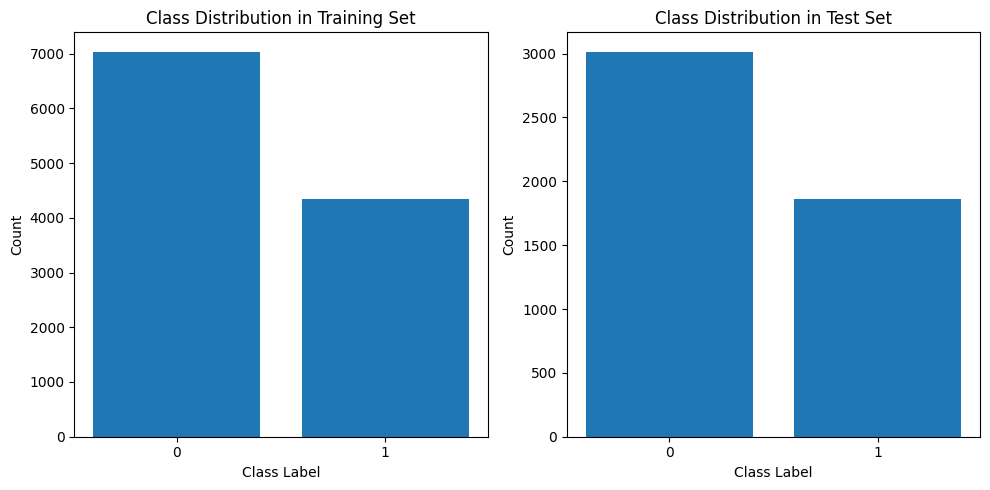

Setting class weigths to: {0: 0.8091245025582717, 1: 1.308735632183908}


####################  Logistic Regression  ####################


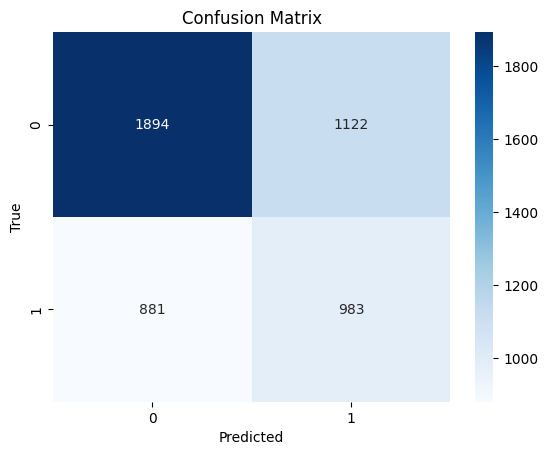

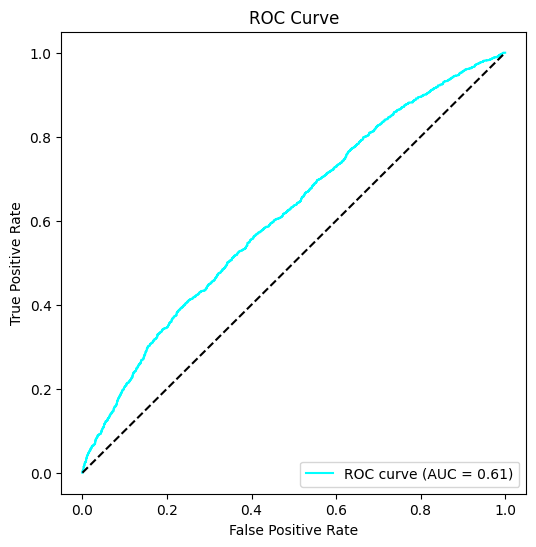

              precision    recall  f1-score   support

           0       0.68      0.63      0.65      3016
           1       0.47      0.53      0.50      1864

    accuracy                           0.59      4880
   macro avg       0.57      0.58      0.57      4880
weighted avg       0.60      0.59      0.59      4880

####################  Decision Tree  ####################


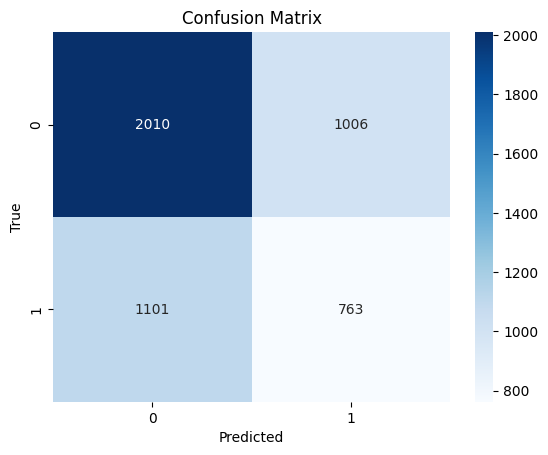

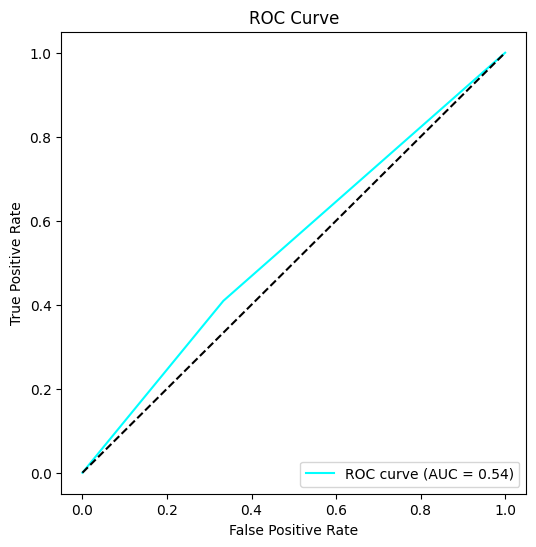

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      3016
           1       0.43      0.41      0.42      1864

    accuracy                           0.57      4880
   macro avg       0.54      0.54      0.54      4880
weighted avg       0.56      0.57      0.57      4880



In [9]:
LABEL = 'patient_sex'

if quality:
    wrong_indices_good, wrong_indices_bad = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, quality=quality)
else:
    wrong_indices = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, quality=quality)

## Diabetic Retinopathy

### 5 Class

Training set size is: 11386 rows and 1024 columns
Test set size is: 4880 rows and 1024 columns


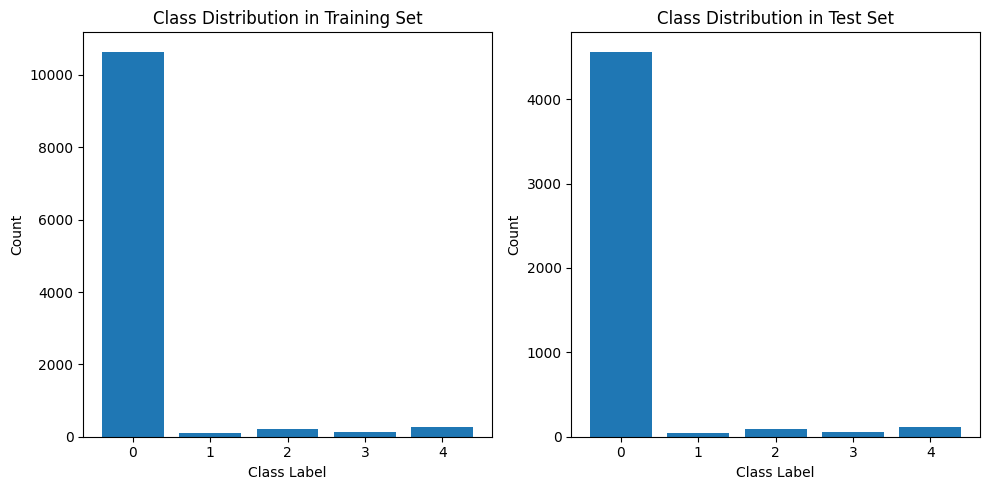

Setting class weigths to: {0: 0.21388184465107543, 1: 20.15221238938053, 2: 10.494009216589863, 3: 17.121804511278196, 4: 8.25072463768116}


####################  Logistic Regression  ####################


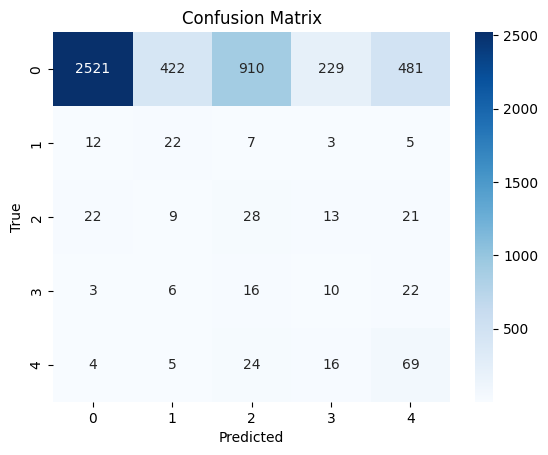

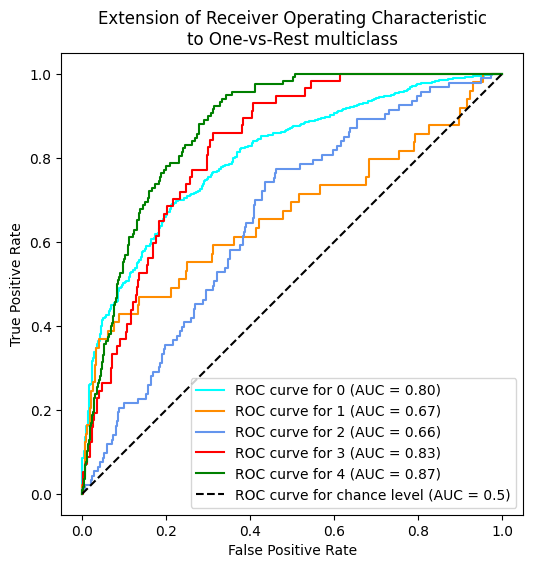

              precision    recall  f1-score   support

           0       0.98      0.55      0.71      4563
           1       0.05      0.45      0.09        49
           2       0.03      0.30      0.05        93
           3       0.04      0.18      0.06        57
           4       0.12      0.58      0.19       118

    accuracy                           0.54      4880
   macro avg       0.24      0.41      0.22      4880
weighted avg       0.92      0.54      0.67      4880

####################  Decision Tree  ####################


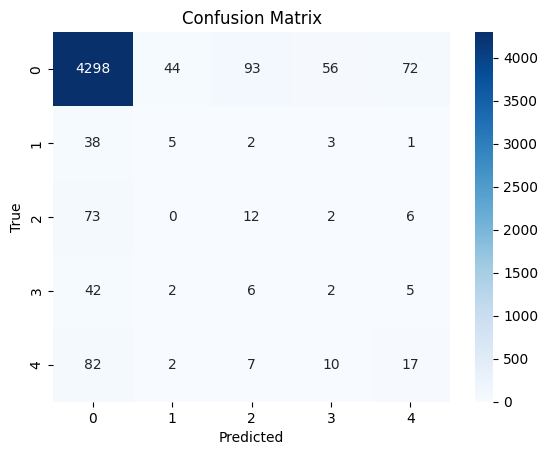

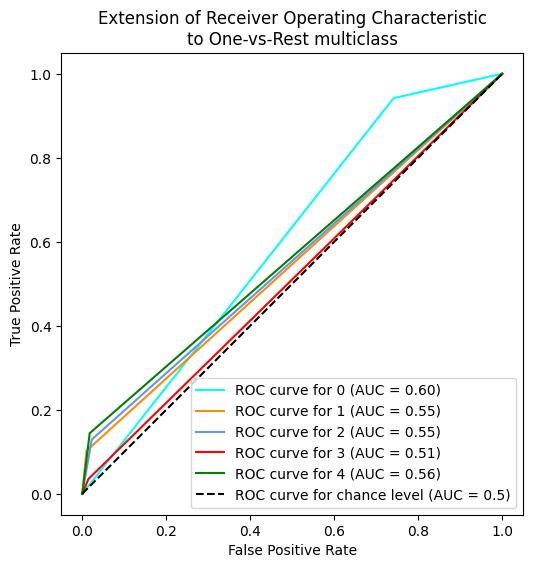

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4563
           1       0.09      0.10      0.10        49
           2       0.10      0.13      0.11        93
           3       0.03      0.04      0.03        57
           4       0.17      0.14      0.16       118

    accuracy                           0.89      4880
   macro avg       0.27      0.27      0.27      4880
weighted avg       0.89      0.89      0.89      4880



In [10]:
LABEL = 'DR_ICDR'
DR_ICDR_3 = False

if quality:
    wrong_indices_good, wrong_indices_bad = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3, quality=quality)
else:
    wrong_indices = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3, quality=quality)
    

### 3 Class

Training set size is: 11386 rows and 1024 columns
Test set size is: 4880 rows and 1024 columns


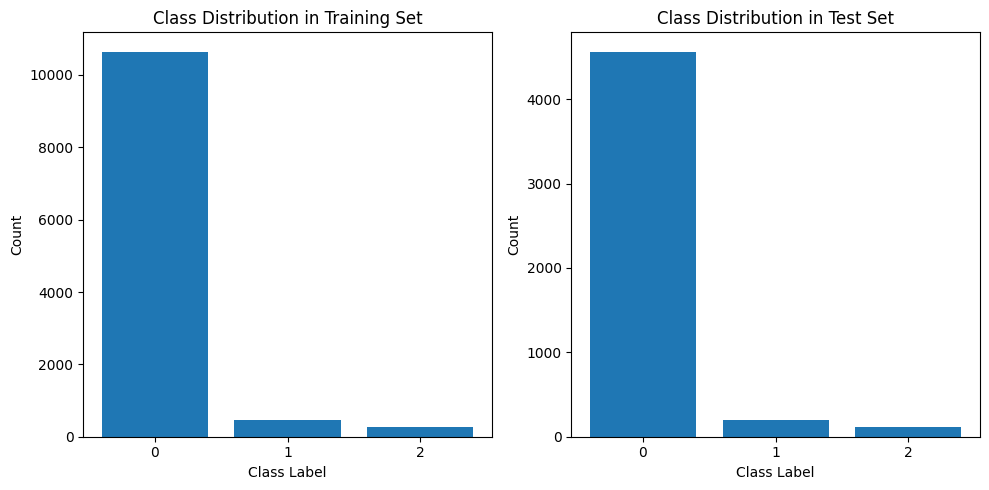

Setting class weigths to: {0: 0.3564697410851257, 1: 8.197264218862491, 2: 13.751207729468598}


####################  Logistic Regression  ####################


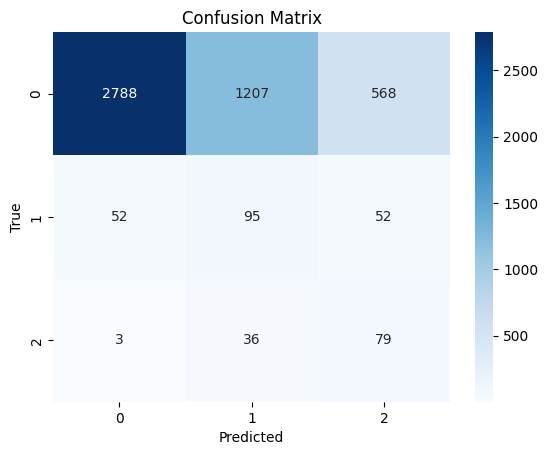

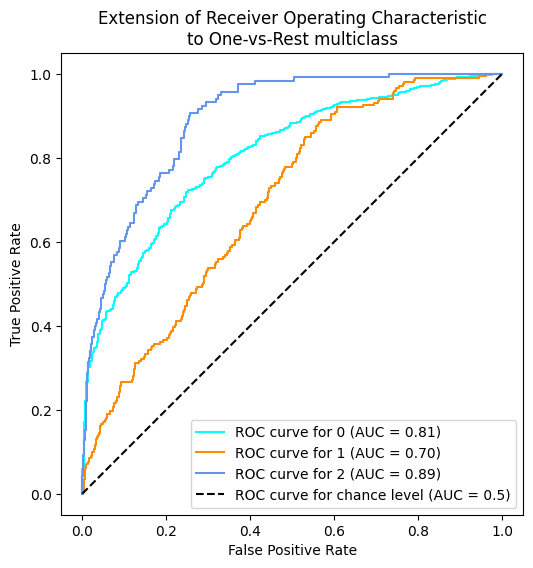

              precision    recall  f1-score   support

           0       0.98      0.61      0.75      4563
           1       0.07      0.48      0.12       199
           2       0.11      0.67      0.19       118

    accuracy                           0.61      4880
   macro avg       0.39      0.59      0.36      4880
weighted avg       0.92      0.61      0.71      4880

####################  Decision Tree  ####################


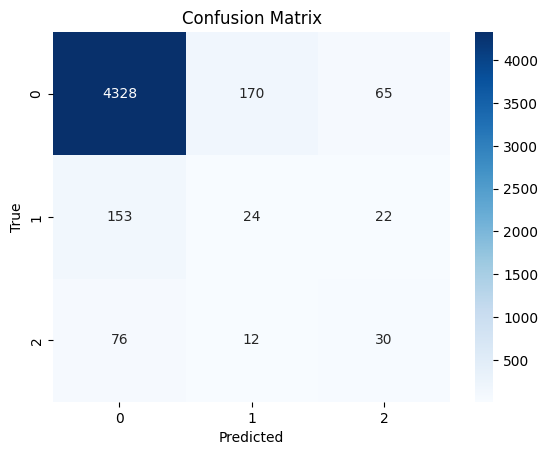

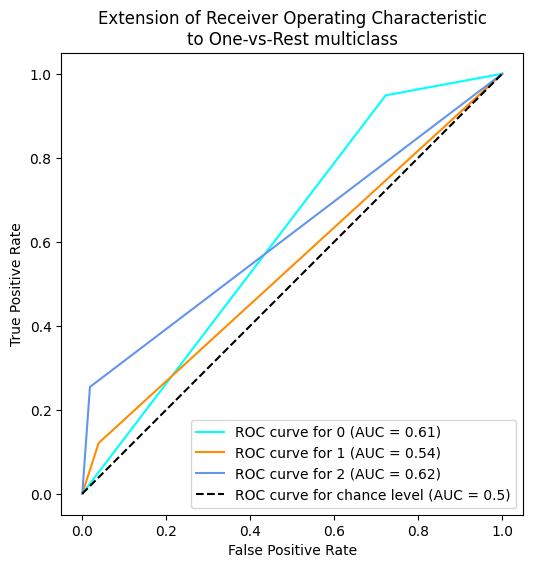

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4563
           1       0.12      0.12      0.12       199
           2       0.26      0.25      0.26       118

    accuracy                           0.90      4880
   macro avg       0.44      0.44      0.44      4880
weighted avg       0.90      0.90      0.90      4880



In [11]:
LABEL = 'DR_ICDR'
DR_ICDR_3= True
if quality:
    wrong_indices_good, wrong_indices_bad = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3, quality=quality)
else:
    wrong_indices = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, DR_ICDR_3=DR_ICDR_3, quality=quality)

### 2 Class

Training set size is: 11386 rows and 1024 columns
Test set size is: 4880 rows and 1024 columns


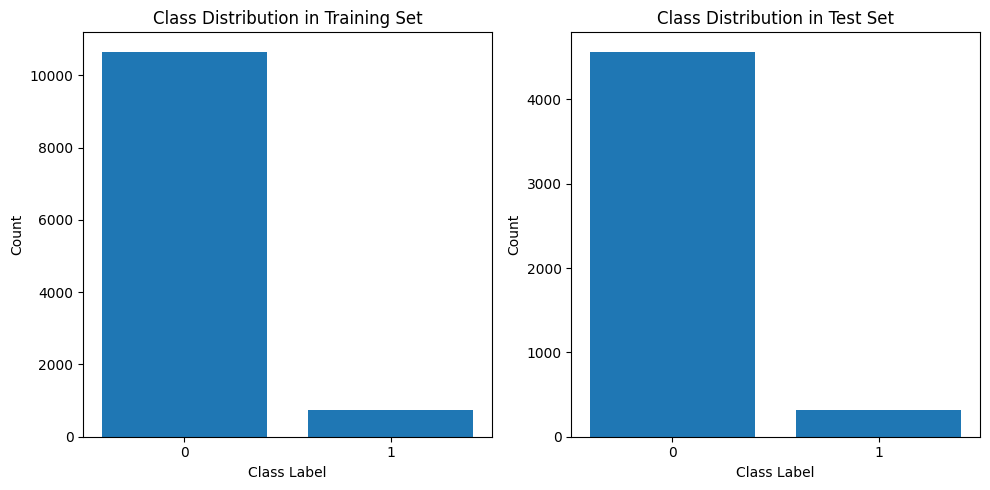

Setting class weigths to: {0: 0.534353294537263, 1: 7.777322404371585}


####################  Logistic Regression  ####################


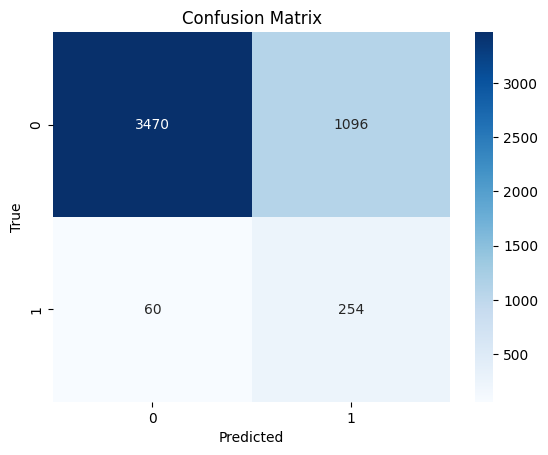

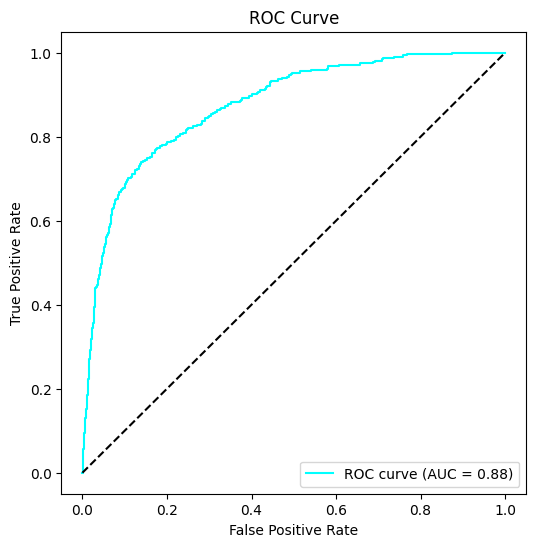

              precision    recall  f1-score   support

           0       0.98      0.76      0.86      4566
           1       0.19      0.81      0.31       314

    accuracy                           0.76      4880
   macro avg       0.59      0.78      0.58      4880
weighted avg       0.93      0.76      0.82      4880

####################  Decision Tree  ####################


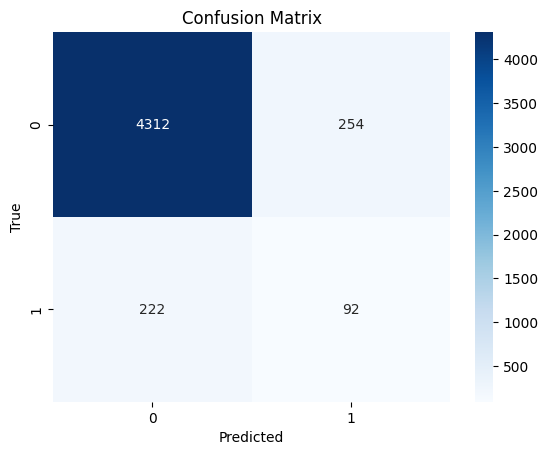

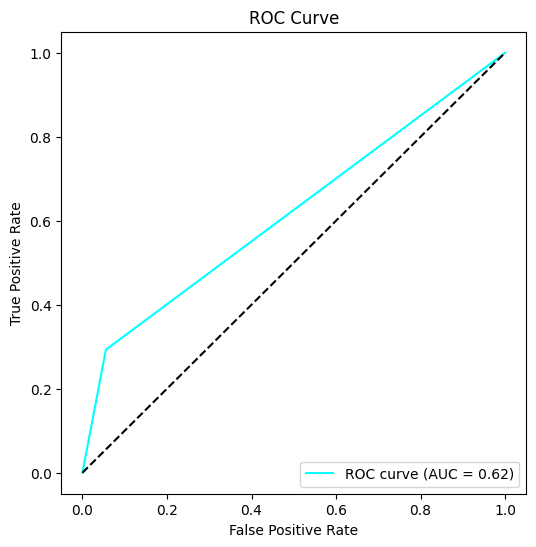

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4566
           1       0.27      0.29      0.28       314

    accuracy                           0.90      4880
   macro avg       0.61      0.62      0.61      4880
weighted avg       0.91      0.90      0.90      4880



In [12]:
LABEL = 'diabetic_retinopathy'
if quality:
    wrong_indices_good, wrong_indices_bad = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, quality=quality)
else:
    wrong_indices = run_experiments(LABELS_PATH, LABEL, EMBEDDINGS_BACKBONE, EMBEDDINGS_DIR, TEST_SIZE, CLASS_WEIGTHS, quality=quality)